# Desafio Cientista de Dados - Séries temporais

O desafio tem como objetivo desenvolver um EDA (exploratory data analysis) e os conhecimentos/insights relacionados a um tipo clássico de problema de data science: séries temporais. Para isso, foi previsto o crescimento do índice GDP de cada país nos anos de 2024-2028, sendo compadaro posteriormente com o previsto pelo Statistica.

## Importando os dados raw de arquivo .xlsx e instalando os pacotes e bibliotecas necessários

In [9]:
pwd

'/content'

In [10]:
!sudo apt install python3.10-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10-venv is already the newest version (3.10.12-1~22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [11]:
!python3 -m venv venv

In [12]:
!source venv/bin/activate

In [13]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_excel('/content/drive/MyDrive/Lighthouse/Desafio DS/imf-dm-export-20230513.xlsx')
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
1,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
2,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2


## Substituindo os dados identificados como "no data" por NaN

In [15]:
df = df.replace('no data', np.nan)
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
2,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1.0,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
4,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4.0,4.1,4.2,4.2


## Verificando a quantidade de elementos nulos e os tipos de dados

In [16]:
df.isnull().sum(axis=0)

Real GDP growth (Annual percent change)     0
1980                                       59
1981                                       55
1982                                       54
1983                                       54
1984                                       54
1985                                       54
1986                                       53
1987                                       52
1988                                       51
1989                                       51
1990                                       51
1991                                       40
1992                                       37
1993                                       25
1994                                       23
1995                                       21
1996                                       18
1997                                       18
1998                                       15
1999                                       12
2000                              

In [17]:
df.dtypes

Real GDP growth (Annual percent change)     object
1980                                       float64
1981                                       float64
1982                                       float64
1983                                       float64
1984                                       float64
1985                                       float64
1986                                       float64
1987                                       float64
1988                                       float64
1989                                       float64
1990                                       float64
1991                                       float64
1992                                       float64
1993                                       float64
1994                                       float64
1995                                       float64
1996                                       float64
1997                                       float64
1998                           

## Descrição dos dados
Abaixo uma visão geral sobre as principais métricas por ano, analisando todos os países: média, mediana, desvio padrão, valor mínimo, valor máximo e quartis, e análise geral dos dados.

In [18]:
pd.set_option('display.max_columns', None)
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
count,169.000000,173.000000,174.000000,174.000000,174.000000,174.000000,175.000000,176.000000,177.000000,177.000000,177.000000,188.000000,191.00000,203.000000,205.000000,207.000000,210.000000,210.000000,213.000000,216.000000,216.000000,223.000000,224.000000,225.000000,225.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,225.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,225.000000,225.000000,225.000000,224.000000,223.000000,223.000000,223.000000,223.000000
mean,2.872189,2.444509,1.303448,1.936782,4.177586,3.129310,3.742286,3.710227,4.140678,3.468362,2.874011,2.045745,2.82199,1.832512,2.292683,3.728019,4.325238,4.736667,3.168545,3.337500,4.496296,3.481166,3.397768,4.779111,5.798667,5.059735,5.622124,5.726549,4.069469,0.012389,4.540708,3.975556,3.544053,3.234361,3.406167,2.649339,2.802643,3.177533,3.205286,2.588987,-4.726872,5.449778,3.948000,3.389333,3.700000,3.427803,3.526009,3.316143,3.298206
std,5.417190,5.465041,5.964451,5.150310,6.281408,4.490556,4.436724,4.966437,5.652045,5.947604,5.419630,7.241771,9.18088,6.422988,7.260165,5.238050,6.673405,10.987311,4.371239,4.438346,8.178178,5.447779,4.374236,7.140519,5.590525,3.977070,4.407695,3.825889,5.795139,5.390314,4.246382,5.501345,7.881147,4.724429,3.766534,4.740471,3.586083,3.817064,3.048657,3.519304,7.596170,5.266989,6.059085,4.891298,3.685251,1.765342,2.790709,1.713988,1.676654
min,-21.600000,-20.000000,-36.800000,-16.100000,-16.800000,-13.000000,-19.300000,-15.400000,-28.200000,-42.200000,-26.200000,-41.000000,-44.90000,-29.300000,-41.900000,-15.400000,-24.800000,-17.600000,-22.400000,-12.100000,-14.300000,-9.300000,-12.500000,-29.000000,-6.300000,-13.100000,-8.300000,-6.800000,-19.400000,-15.100000,-8.900000,-50.300000,-50.300000,-36.400000,-23.000000,-28.000000,-17.000000,-15.700000,-19.700000,-27.700000,-54.200000,-17.900000,-30.300000,-3.000000,-8.200000,-8.600000,-1.600000,-1.100000,-0.500000
25%,0.100000,0.100000,-0.800000,-1.000000,1.925000,1.100000,1.950000,1.500000,1.700000,1.400000,0.600000,-0.200000,0.30000,-0.550000,1.500000,2.150000,1.925000,2.600000,2.000000,1.475000,2.775000,1.300000,1.400000,2.200000,3.100000,2.925000,3.500000,3.300000,1.425000,-3.400000,2.225000,1.900000,1.100000,1.400000,1.650000,1.550000,1.600000,1.750000,1.800000,1.250000,-7.150000,3.100000,2.400000,1.500000,2.000000,2.300000,2.200000,2.200000,2.200000
50%,3.300000,2.600000,1.500000,2.400000,4.100000,3.500000,3.600000,3.600000,4.200000,3.800000,3.400000,2.300000,2.80000,2.300000,3.500000,3.900000,4.050000,4.300000,3.500000,3.300000,4.200000,3.000000,3.450000,4.300000,5.000000,4.900000,5.400000,5.700000,4.000000,0.100000,4.500000,4.100000,3.400000,3.400000,3.300000,3.000000,3.000000,3.300000,3.200000,2.600000,-3.600000,5.200000,3.800000,2.900000,3.150000,3.200000,3.000000,3.000000,3.000000
75%,5.800000,5.500000,4.100000,4.600000,6.100000,5.300000,6.100000,5.900000,6.900000,5.400000,5.600000,5.800000,6.50000,5.200000,5.600000,6.300000,6.000000,5.975000,5.000000,4.700000,5.900000,4.950000,5.300000,6.900000,7.300000,7.000000,7.375000,7.775000,6.100000,3.300000,6.900000,6.300000,5.500000,5.200000,5.000000,4.650000,4.700000,4.800000,4.800000,4.500000,-1.450000,7.400000,5.700000,4.400000,4.500000,4.400000,4.300000,4.300000,4.300000
max,18.800000,17.100000,23.200000,22.700000,44.500000,24.300000,18.600000,22.000000,23.400000,25.900000,23.600000,38.200000,82.80000,35.100000,20.900000,26.500000,62.200000,148.000000,24.800000,26.400000,110.500000,60.000000,26.400000,81.800000,53.400000,28.000000,34.500000,25.500000,63.300000,20.600000,25.100000,25.700000,86.800000,27.300000,30.900000,24.400000,15.200000,32.500000,14.600000,13.800000,43.500000,41.700000,62.300000,58.900000,45.

## Variação dos dados ao longo dos anos

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='1980'>

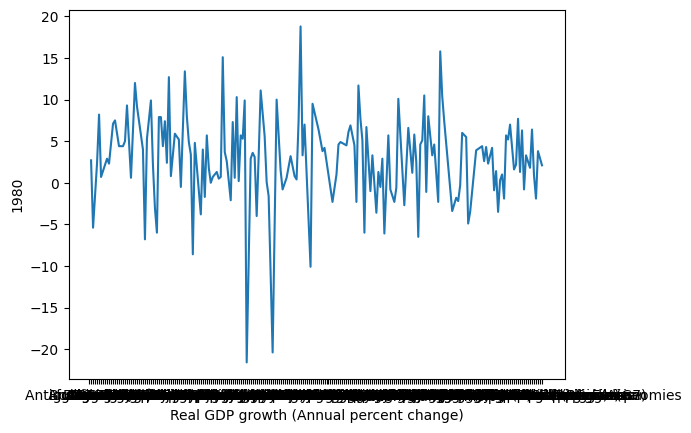

In [19]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=1980, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='1985'>

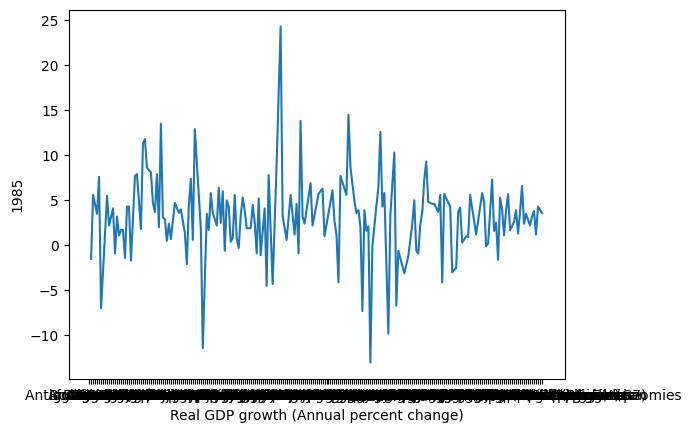

In [20]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=1985, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='1990'>

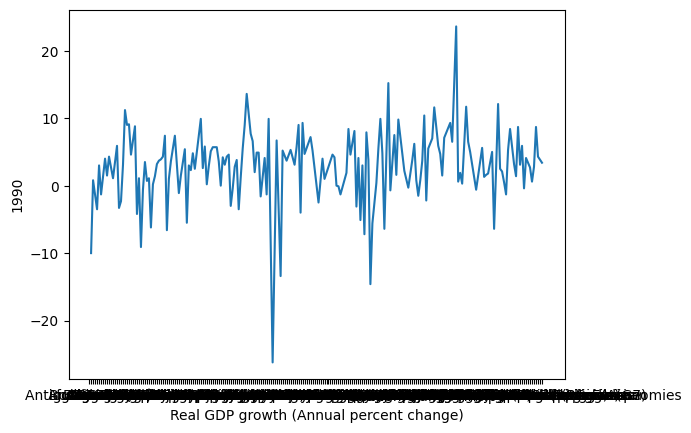

In [21]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=1990, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='1995'>

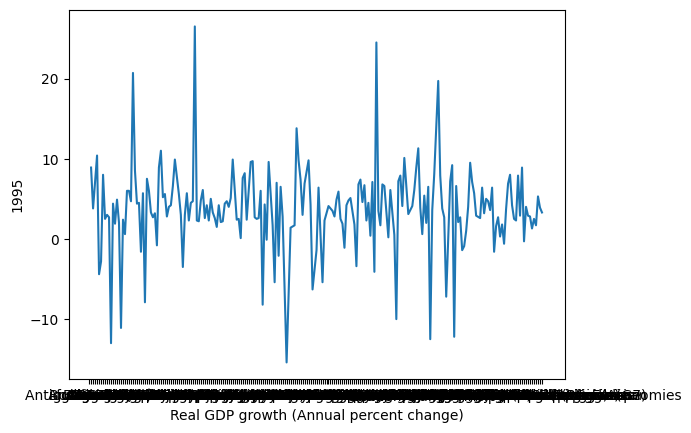

In [22]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=1995, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2000'>

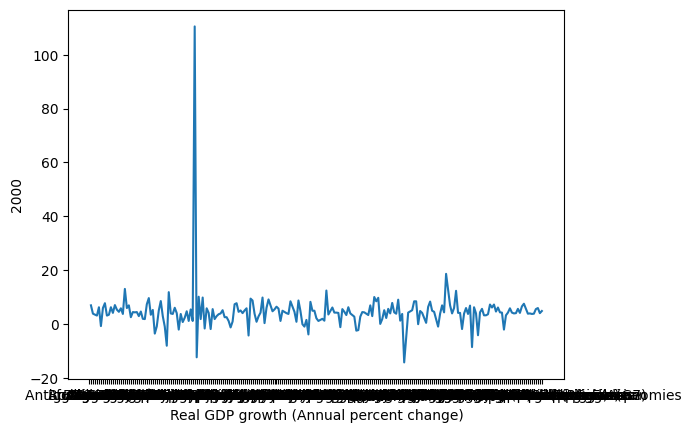

In [23]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2000, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2005'>

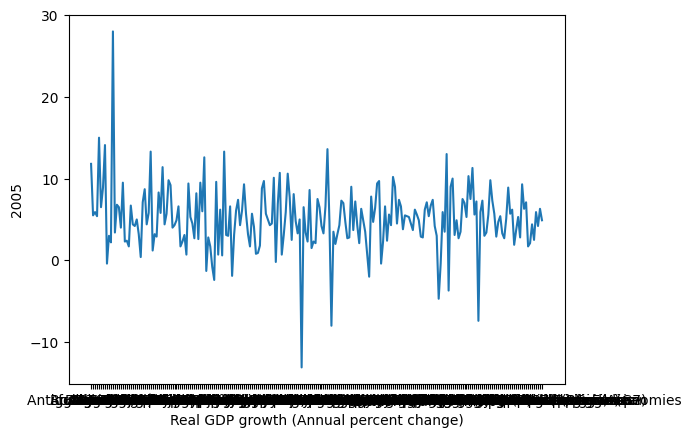

In [24]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2005, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2010'>

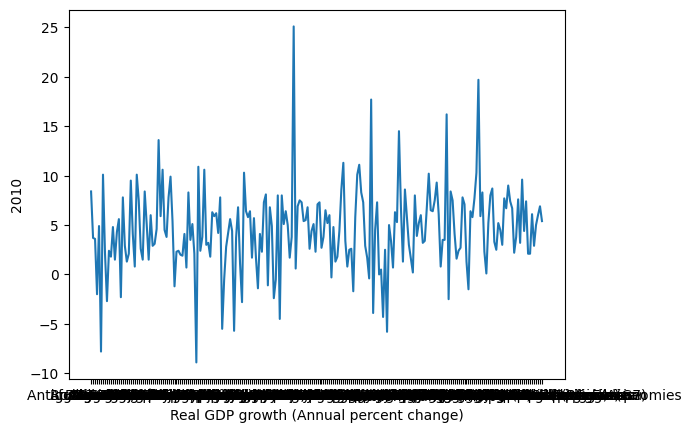

In [25]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2010, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2015'>

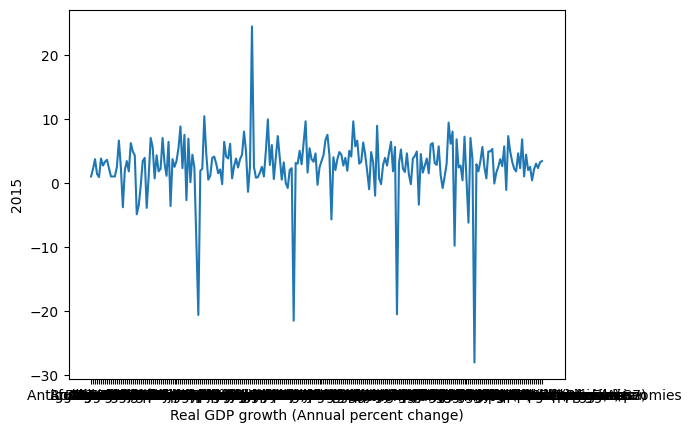

In [26]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2015, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2020'>

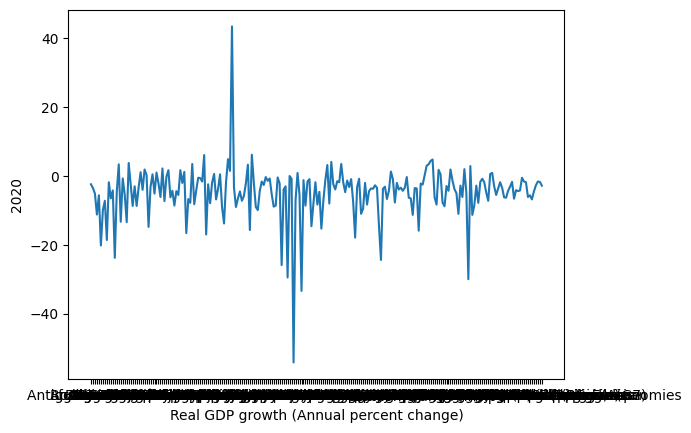

In [27]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2020, data=df)

<Axes: xlabel='Real GDP growth (Annual percent change)', ylabel='2022'>

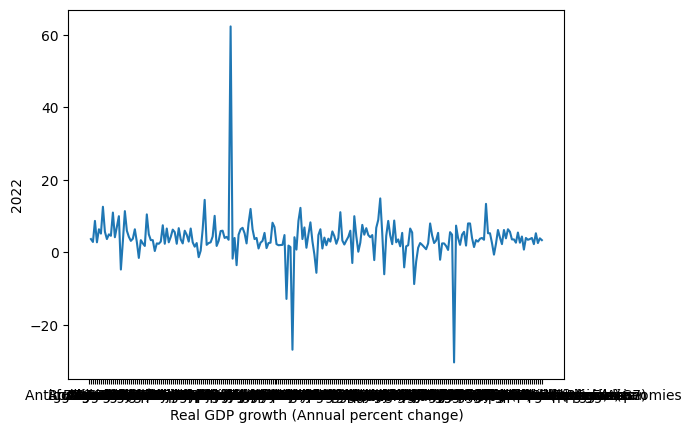

In [28]:
sns.lineplot(x='Real GDP growth (Annual percent change)', y=2022, data=df)

In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1980,1.000000,0.503415,0.125532,0.019086,0.185742,0.131726,0.176067,0.154446,0.209870,-0.072850,0.123477,0.185547,-0.219020,-0.013831,0.117208,0.101216,0.109454,0.054433,0.005036,0.144584,0.075356,-0.023740,0.022003,-0.040895,-0.096692,-0.026846,0.124069,0.056833,0.139960,-0.050799,0.074130,0.018690,-0.008654,0.141866,0.134886,0.048561,0.042892,0.103824,0.152621,0.132416,-0.098314,0.182734,-0.035320,-0.008369,-0.028492,0.041655,-0.031239,0.041532,0.039583
1981,0.503415,1.000000,0.239354,0.093173,0.281905,0.180871,0.213498,0.234757,0.130421,-0.053060,0.293886,0.103806,-0.104706,0.000188,0.095034,0.236127,0.081619,0.063006,-0.009456,0.192031,0.099151,0.042235,0.207881,-0.140896,-0.059925,-0.073819,0.116062,0.062197,0.136687,0.115952,0.072069,0.316149,-0.222278,0.118432,0.321325,0.094297,0.201682,-0.055845,0.107030,0.132922,0.070229,-0.078350,0.057882,-0.048934,0.006953,0.029238,0.020914,0.072355,0.075524
1982,0.125532,0.239354,1.000000,0.327184,-0.130220,0.132805,0.091838,-0.020075,0.296778,0.267065,0.257626,-0.087367,-0.131427,-0.046151,-0.005187,0.061989,0.061093,-0.046369,-0.040620,0.187248,0.082139,0.070571,0.164920,0.061270,0.004584,0.033466,0.006170,0.032464,0.005509,-0.050047,0.049314,-0.054483,-0.009702,0.054954,0.077461,0.020721,0.138769,0.155215,0.136160,0.153600,0.102643,-0.019769,-0.146196,-0.020296,-0.045668,0.124309,-0.063071,0.040194,0.045525
1983,0.019086,0.093173,0.327184,1.000000,0.393839,0.404989,0.076220,0.337694,-0.005891,-0.027761,0.020248,0.097467,0.104178,0.177533,0.003959,0.170477,0.106710,0.040787,-0.009968,0.164489,0.118859,0.070296,0.171564,0.107165,0.147866,0.041997,-0.036622,0.179097,0.029855,0.073202,0.127055,0.007683,-0.090528,0.070405,0.115012,0.036806,0.179214,0.066594,0.131926,0.144976,-0.054411,-0.008686,-0.160745,-0.200926,-0.198452,0.011018,-0.165584,-0.101997,-0.092196
1984,0.185742,0.281905,-0.130220,0.393839,1.000000,0.389094,0.187659,0.278738,-0.171089,-0.201026,-0.087550,0.205152,0.054757,0.104551,0.089479,0.183353,-0.016153,0.045003,-0.075609,0.030942,0.019778,-0.057635,0.107720,-0.075434,0.040902,-0.160810,0.071209,0.052174,0.128681,0.025125,0.037537,0.202639,-0.124522,0.004962,0.053729,-0.002766,0.078615,-0.089675,-0.051594,-0.040867,-0.146031,0.012800,-0.007251,-0.086031,-0.106550,-0.071256,-0.082705,-0.149417,-0.147562
1985,0.131726,0.180871,0.132805,0.404989,0.389094,1.000000,0.061488,0.137225,0.015586,-0.170888,0.054104,0.324391,-0.004968,0.030685,0.079218,0.177032,0.197179,0.193094,0.178010,0.156324,0.143578,0.158089,0.113833,-0.009227,-0.040545,-0.141355,-0.088708,0.019736,0.083454,0.082603,-0.029578,-0.010572,-0.015449,-0.023988,0.055160,-0.033222,0.073744,0.052467,0.087801,0.045298,-0.089387,0.081976,-0.030191,-0.026403,-0.028267,-0.025746,-0.030704,0.006607,0.010415
1986,0.176067,0.213498,0.091838,0.076220,0.187659,0.061488,1.000000,0.337131,0.279818,0.095562,-0.060164,-0.096962,0.066243,0.141241,0.041728,0.045369,-0.035999,-0.098256,0.005971,-0.002721,-0.079021,-0.083338,-0.022364,-0.001365,0.026901,0.066012,0.091459,0.048341,0.070988,-0.041406,0.087190,0.271522,-0.215979,0.101496,0.209733,0.078583,0.105168,-0.102785,0.096424,0.187617,-0.034617,0.016762,0.080883,-0.075128,-0.025922,0.065793,-0.036883,-0.020000,-0.016204
1987,0.154446,0.234757,-0.020075,0.337694,0.278738,0.137225,0.337131,1.000000,0.162550,0.030538,0.069899,0.131223,0.162767,0.354749,0.155269,0.160348,0.062950,0.076254,-0.069729,0.262402,0.116418,0.031794,0.159341,-0.006222,0.113451,0.123804,0.150383,0.232034,0.043362,-0.042779,0.135690,0.249378,-0.269414,0.200686,0.211014,0.073365,0.156385,-0.089535,0.051512,0.115693,-0.074566,0.141352,0.068289,-0.123109,-0.080048,-0.042584,-0.041737,0.065810,0.062974
1988,0.209870,0.130421,0.296778,-0.005891,-0.171089,0.015586,0.27

<ipython-input-30-632a24ad194c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', center=0)


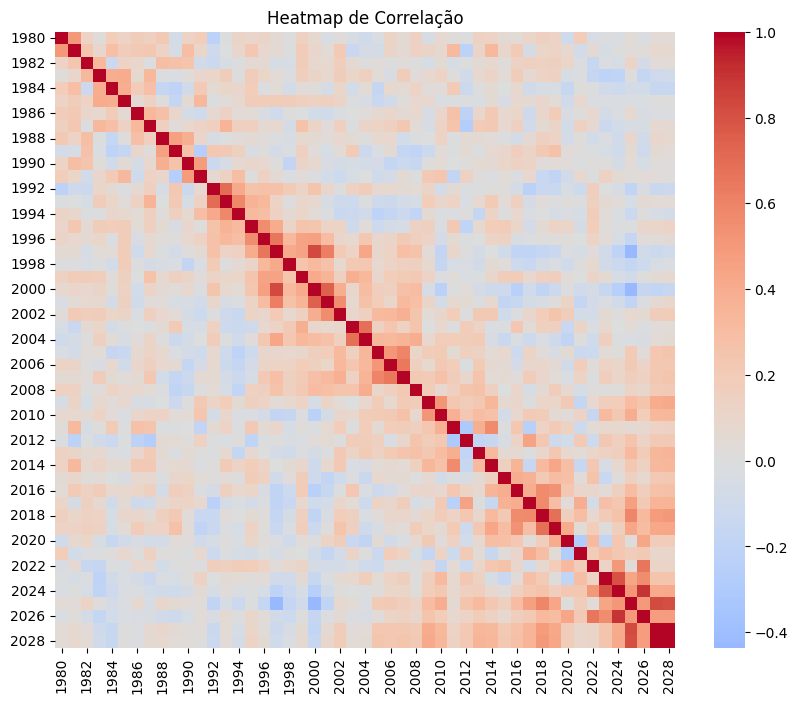

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

Vê-se que os dados no geral não tem correlação forte entre si, os que tem uma corelação mais forte são os dados previstos a partir de 2024.

# Substituição dos elementos nulos pela mediana referente àquele ano
A mediana foi escolhida para substituir os dados nulos pois ela é menos influenciada pelos outliers do que a média e a distribuição permanece mais fiel em relação aos dados já existentes.

In [31]:
df[1980] = df[1980].fillna(df[1980].median())
df[1981] = df[1981].fillna(df[1981].median())
df[1982] = df[1982].fillna(df[1982].median())
df[1983] = df[1983].fillna(df[1983].median())
df[1984] = df[1984].fillna(df[1984].median())
df[1985] = df[1985].fillna(df[1985].median())
df[1986] = df[1986].fillna(df[1986].median())
df[1987] = df[1987].fillna(df[1987].median())
df[1988] = df[1988].fillna(df[1988].median())
df[1989] = df[1989].fillna(df[1989].median())
df[1990] = df[1990].fillna(df[1990].median())
df[1991] = df[1991].fillna(df[1991].median())
df[1992] = df[1992].fillna(df[1992].median())
df[1993] = df[1993].fillna(df[1993].median())
df[1994] = df[1994].fillna(df[1994].median())
df[1995] = df[1995].fillna(df[1995].median())
df[1996] = df[1996].fillna(df[1996].median())
df[1997] = df[1997].fillna(df[1997].median())
df[1998] = df[1998].fillna(df[1998].median())
df[1999] = df[1999].fillna(df[1999].median())
df[2000] = df[2000].fillna(df[2000].median())
df[2001] = df[2001].fillna(df[2001].median())
df[2002] = df[2002].fillna(df[2002].median())
df[2003] = df[2003].fillna(df[2003].median())
df[2004] = df[2004].fillna(df[2004].median())
df[2005] = df[2005].fillna(df[2005].median())
df[2006] = df[2006].fillna(df[2006].median())
df[2007] = df[2007].fillna(df[2007].median())
df[2008] = df[2008].fillna(df[2008].median())
df[2009] = df[2009].fillna(df[2009].median())
df[2010] = df[2010].fillna(df[2010].median())
df[2011] = df[2011].fillna(df[2011].median())
df[2012] = df[2012].fillna(df[2012].median())
df[2013] = df[2013].fillna(df[2013].median())
df[2014] = df[2014].fillna(df[2014].median())
df[2015] = df[2015].fillna(df[2015].median())
df[2016] = df[2016].fillna(df[2016].median())
df[2017] = df[2017].fillna(df[2017].median())
df[2018] = df[2018].fillna(df[2018].median())
df[2019] = df[2019].fillna(df[2019].median())
df[2020] = df[2020].fillna(df[2020].median())
df[2021] = df[2021].fillna(df[2021].median())
df[2022] = df[2022].fillna(df[2022].median())
df[2023] = df[2023].fillna(df[2023].median())
df[2024] = df[2024].fillna(df[2024].median())
df[2025] = df[2025].fillna(df[2025].median())
df[2026] = df[2026].fillna(df[2026].median())
df[2027] = df[2027].fillna(df[2027].median())
df[2028] = df[2028].fillna(df[2028].median())

In [32]:
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,3.3,2.6,1.5,2.4,4.1,3.5,3.6,3.6,4.2,3.8,3.4,2.3,2.8,2.3,3.5,3.9,4.05,4.3,3.5,3.3,4.2,3.0,3.45,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,5.2,3.8,2.9,3.15,3.2,3.0,3.0,3.0
1,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,9.8,-10.0,-28.0,-7.2,9.6,9.4,8.9,9.10,-10.9,8.8,12.9,6.9,8.3,4.50,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.0,2.1,-3.5,8.5,3.7,2.2,3.30,3.4,3.4,3.4,3.4
2,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.80,1.1,5.1,3.2,3.8,3.0,5.60,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,2.9,2.6,2.60,2.2,2.1,1.7,1.8
3,Andorra,3.3,2.6,1.5,2.4,4.1,3.5,3.6,3.6,4.2,3.8,3.4,2.3,2.8,2.3,3.5,3.9,4.05,4.3,3.5,3.3,4.2,8.1,4.50,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2.0,0.0,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-11.2,8.9,8.7,1.3,1.50,1.5,1.5,1.5,1.5
4,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,0.0,-3.5,12.1,11.4,11.0,10.5,10.4,11.20,7.3,4.7,2.2,3.1,4.2,13.70,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,3.5,8.5,5.0,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.1,2.8,3.5,3.70,4.0,4.1,4.2,4.2


Contagem de nulos realizada novamente, para conferir se a substituição foi feita em todos os nulos, e verificação dos tipos de dados.

In [33]:
df.isnull().sum(axis=0)

Real GDP growth (Annual percent change)    0
1980                                       0
1981                                       0
1982                                       0
1983                                       0
1984                                       0
1985                                       0
1986                                       0
1987                                       0
1988                                       0
1989                                       0
1990                                       0
1991                                       0
1992                                       0
1993                                       0
1994                                       0
1995                                       0
1996                                       0
1997                                       0
1998                                       0
1999                                       0
2000                                       0
2001      

In [34]:
df.dtypes

Real GDP growth (Annual percent change)     object
1980                                       float64
1981                                       float64
1982                                       float64
1983                                       float64
1984                                       float64
1985                                       float64
1986                                       float64
1987                                       float64
1988                                       float64
1989                                       float64
1990                                       float64
1991                                       float64
1992                                       float64
1993                                       float64
1994                                       float64
1995                                       float64
1996                                       float64
1997                                       float64
1998                           

As colunas que indicam os valores de 2024 a 2028 foram descartadas pois serão previstas ao final da análise.

In [35]:
df = df.drop(columns=[2024])
df = df.drop(columns=[2025])
df = df.drop(columns=[2026])
df = df.drop(columns=[2027])
df = df.drop(columns=[2028])

In [36]:
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,3.3,2.6,1.5,2.4,4.1,3.5,3.6,3.6,4.2,3.8,3.4,2.3,2.8,2.3,3.5,3.9,4.05,4.3,3.5,3.3,4.2,3.0,3.45,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,5.2,3.8,2.9
1,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,9.8,-10.0,-28.0,-7.2,9.6,9.4,8.9,9.10,-10.9,8.8,12.9,6.9,8.3,4.50,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.0,2.1,-3.5,8.5,3.7,2.2
2,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.80,1.1,5.1,3.2,3.8,3.0,5.60,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,2.9,2.6
3,Andorra,3.3,2.6,1.5,2.4,4.1,3.5,3.6,3.6,4.2,3.8,3.4,2.3,2.8,2.3,3.5,3.9,4.05,4.3,3.5,3.3,4.2,8.1,4.50,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2.0,0.0,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-11.2,8.9,8.7,1.3
4,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,0.0,-3.5,12.1,11.4,11.0,10.5,10.4,11.20,7.3,4.7,2.2,3.1,4.2,13.70,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,3.5,8.5,5.0,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.1,2.8,3.5


# Modelagem e predição

Reorganização dos dados para ficarem com a estrutura necessária para a modelagem.

In [37]:
df_long = df.melt(id_vars='Real GDP growth (Annual percent change)', var_name='Year', value_name='GDP_growth')
df_long.head()

,Real GDP growth (Annual percent change),Year,GDP_growth
0,Afghanistan,1980,3.3
1,Albania,1980,2.7
2,Algeria,1980,-5.4
3,Andorra,1980,3.3
4,Angola,1980,2.4


In [38]:
df_long = df_long.rename(columns={'Real GDP growth (Annual percent change)': 'unique_id', 'Year':'ds', 'GDP_growth':'y'})

In [39]:
df_long.dtypes

unique_id     object
ds            object
y            float64
dtype: object

In [40]:
df_long.head()

,unique_id,ds,y
0,Afghanistan,1980,3.3
1,Albania,1980,2.7
2,Algeria,1980,-5.4
3,Andorra,1980,3.3
4,Angola,1980,2.4


In [41]:
df_long['unique_id'] = df_long['unique_id'].astype(str)
df_long['ds'] = df_long['ds'].astype(int)

In [42]:
df_long.head()

,unique_id,ds,y
0,Afghanistan,1980,3.3
1,Albania,1980,2.7
2,Algeria,1980,-5.4
3,Andorra,1980,3.3
4,Angola,1980,2.4


In [43]:
df_long.dtypes

unique_id     object
ds             int64
y            float64
dtype: object

In [44]:
#Exportando a tabela
from google.colab import files

df_long.to_excel('EDA_desafioDS.xlsx')
files.download('EDA_desafioDS.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>